<a href="https://colab.research.google.com/github/ZainulAbideen000748/Machine-Learning-Project-Inventory-/blob/main/Machine_Learning_Project_Final_160126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


BLOCK-1 — Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

sns.set_style('whitegrid')
print("Imports loaded")

Imports loaded


BLOCK-2 — Load Data Sets

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

df = pd.read_csv('/content/sales_train_validation.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

df = pd.read_csv('/content/calendar.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


BLOCK-3 — Melt Wide → Long

In [9]:
sales_df = pd.read_csv('/content/sales_train_validation.csv')
day_cols=[c for c in sales_df.columns if c.startswith('d_')]
long_df=sales_df.melt(id_vars=['id','item_id','store_id'], value_vars=day_cols,
                var_name='day', value_name='daily_sales')
print(long_df)
print(long_df.shape)

                                     id        item_id store_id     day  \
0         HOBBIES_1_001_CA_1_validation  HOBBIES_1_001     CA_1     d_1   
1         HOBBIES_1_002_CA_1_validation  HOBBIES_1_002     CA_1     d_1   
2         HOBBIES_1_003_CA_1_validation  HOBBIES_1_003     CA_1     d_1   
3         HOBBIES_1_004_CA_1_validation  HOBBIES_1_004     CA_1     d_1   
4         HOBBIES_1_005_CA_1_validation  HOBBIES_1_005     CA_1     d_1   
...                                 ...            ...      ...     ...   
21884715    FOODS_3_064_CA_4_validation    FOODS_3_064     CA_4  d_1913   
21884716    FOODS_3_065_CA_4_validation    FOODS_3_065     CA_4  d_1913   
21884717    FOODS_3_066_CA_4_validation    FOODS_3_066     CA_4  d_1913   
21884718    FOODS_3_067_CA_4_validation    FOODS_3_067     CA_4  d_1913   
21884719    FOODS_3_068_CA_4_validation    FOODS_3_068     CA_4  d_1913   

          daily_sales  
0                 0.0  
1                 0.0  
2                 0.0  
3  

BLOCK-4 — Filter Store CA_1

In [10]:
long_df=long_df[long_df['store_id']=='CA_1']
print(long_df.head)

<bound method NDFrame.head of                                      id        item_id store_id     day  \
0         HOBBIES_1_001_CA_1_validation  HOBBIES_1_001     CA_1     d_1   
1         HOBBIES_1_002_CA_1_validation  HOBBIES_1_002     CA_1     d_1   
2         HOBBIES_1_003_CA_1_validation  HOBBIES_1_003     CA_1     d_1   
3         HOBBIES_1_004_CA_1_validation  HOBBIES_1_004     CA_1     d_1   
4         HOBBIES_1_005_CA_1_validation  HOBBIES_1_005     CA_1     d_1   
...                                 ...            ...      ...     ...   
21876324    FOODS_3_823_CA_1_validation    FOODS_3_823     CA_1  d_1913   
21876325    FOODS_3_824_CA_1_validation    FOODS_3_824     CA_1  d_1913   
21876326    FOODS_3_825_CA_1_validation    FOODS_3_825     CA_1  d_1913   
21876327    FOODS_3_826_CA_1_validation    FOODS_3_826     CA_1  d_1913   
21876328    FOODS_3_827_CA_1_validation    FOODS_3_827     CA_1  d_1913   

          daily_sales  
0                 0.0  
1                 0.0

BLOCK-5 — Merge Calendar

In [12]:
df_merged=long_df.merge(df[['d','date','weekday','month','year']],
                          left_on='day', right_on='d', how='left')
df_merged['date']=pd.to_datetime(df_merged['date'])
print(df_merged.shape)

(5832737, 10)


BLOCK-6 — EDA (Basic Stats & Plots)

        daily_sales                           date         month          year
count  5.832737e+06                        5832737  5.832737e+06  5.832737e+06
mean   1.319829e+00  2013-09-10 23:59:59.999999744  6.357554e+00  2.013209e+03
min    0.000000e+00            2011-01-29 00:00:00  1.000000e+00  2.011000e+03
25%    0.000000e+00            2012-05-21 00:00:00  3.000000e+00  2.012000e+03
50%    0.000000e+00            2013-09-11 00:00:00  6.000000e+00  2.013000e+03
75%    1.000000e+00            2015-01-02 00:00:00  9.000000e+00  2.015000e+03
max    6.480000e+02            2016-04-24 00:00:00  1.200000e+01  2.016000e+03
std    4.058652e+00                            NaN  3.458773e+00  1.532086e+00


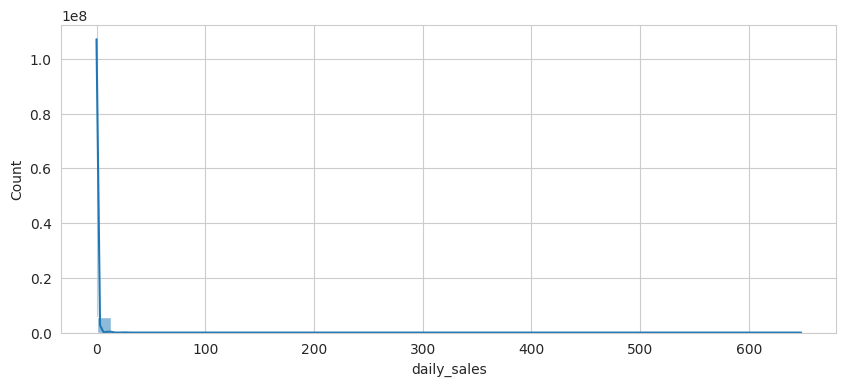

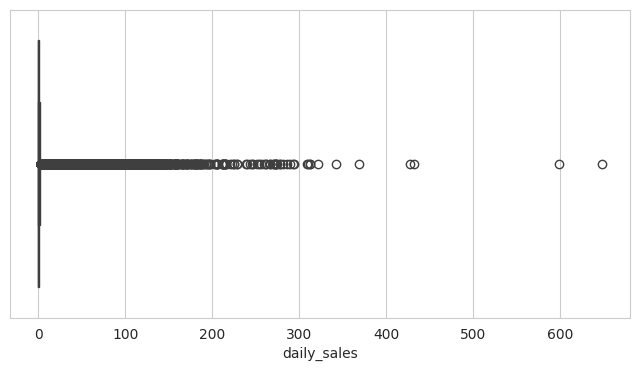

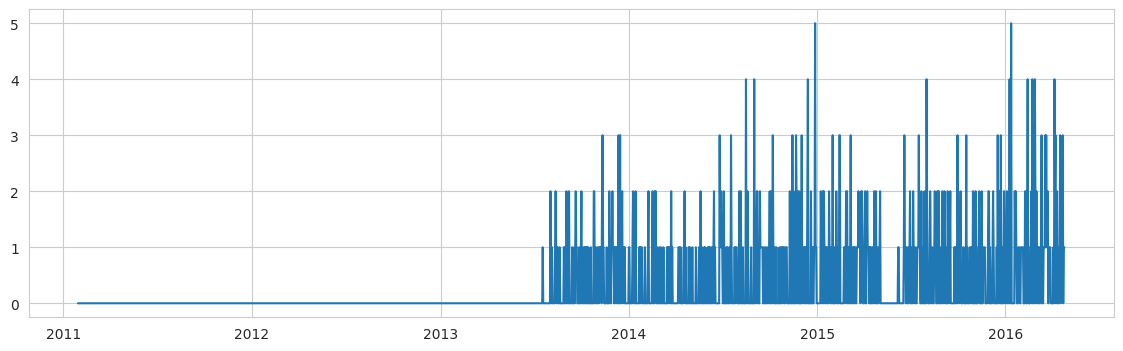

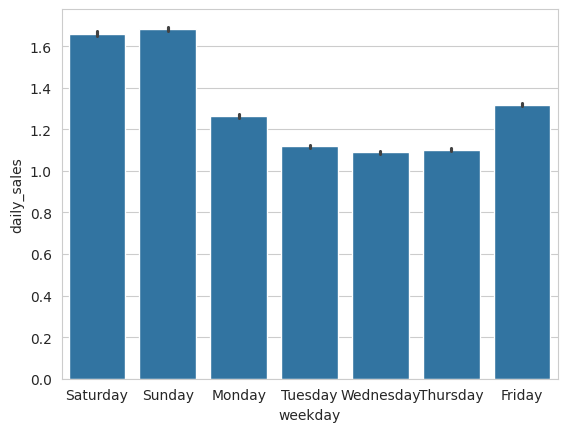

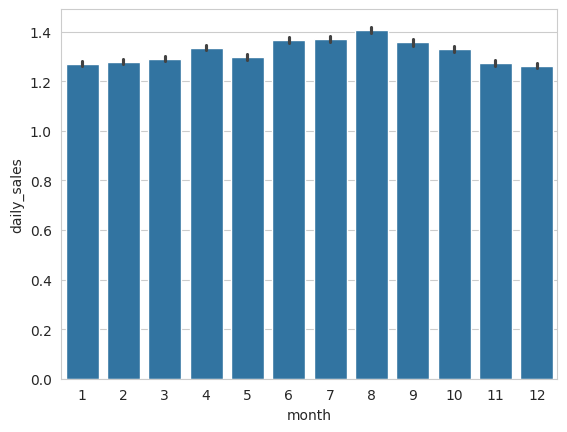

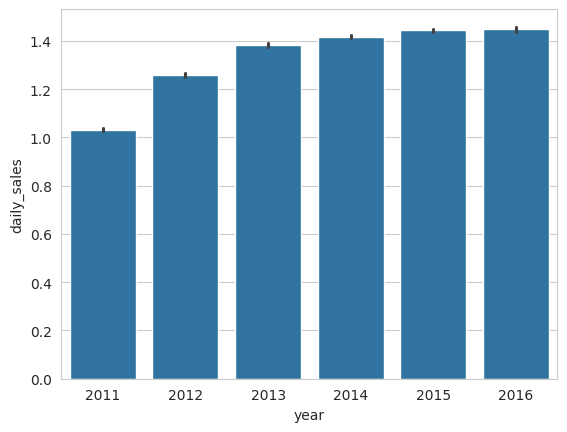

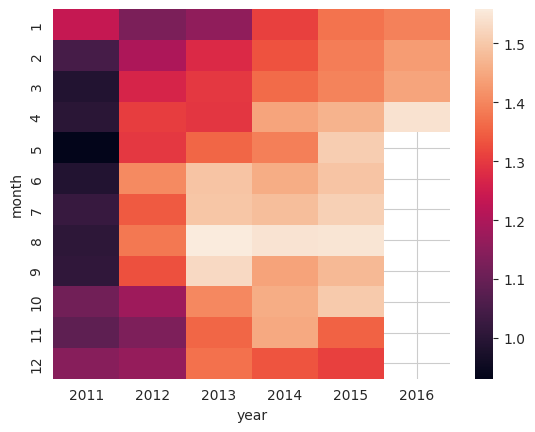

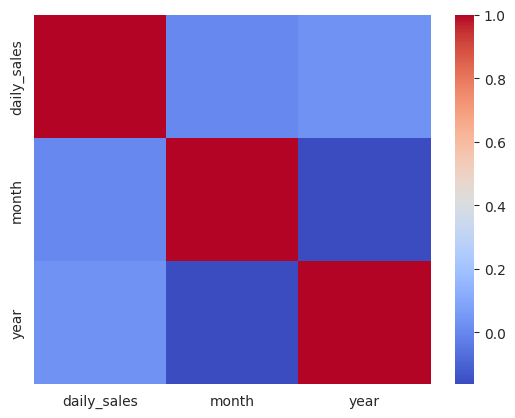

In [13]:
print(df_merged.describe())
plt.figure(figsize=(10,4)); sns.histplot(df_merged['daily_sales'], bins=50, kde=True); plt.show()
plt.figure(figsize=(8,4)); sns.boxplot(x=df_merged['daily_sales']); plt.show()
sid=df_merged['id'].iloc[0]
s=df_merged[df_merged['id']==sid]
plt.figure(figsize=(14,4)); plt.plot(s['date'], s['daily_sales']); plt.show()
sns.barplot(x='weekday', y='daily_sales', data=df_merged); plt.show()
sns.barplot(x='month', y='daily_sales', data=df_merged); plt.show()
sns.barplot(x='year', y='daily_sales', data=df_merged); plt.show()
pivot=df_merged.pivot_table(index='month', columns='year', values='daily_sales', aggfunc='mean')
sns.heatmap(pivot); plt.show()
num=df_merged.select_dtypes(include=[np.number])
sns.heatmap(num.corr(), cmap='coolwarm'); plt.show()

BLOCK-7 — Lag & Rolling Features

In [14]:
df_merged=df_merged.sort_values(['id','date'])
df_merged['lag_1']=df_merged.groupby('id')['daily_sales'].shift(1)
df_merged['lag_7']=df_merged.groupby('id')['daily_sales'].shift(7)
df_merged['rolling_mean_3']=df_merged.groupby('id')['daily_sales'].rolling(3).mean().reset_index(0,drop=True)
df_merged['rolling_mean_7']=df_merged.groupby('id')['daily_sales'].rolling(7).mean().reset_index(0,drop=True)
df_fe=df_merged.dropna()
print(df_fe.shape)

(5811394, 14)
